In [1]:
#!pip install git+https://github.com/if-quantum/pairwise-tomography.git
#!pip install git+https://github.com/qiskit-community/QuantumGraph.git

In [3]:
from quantumgraph import QuantumGraph

In [5]:
# define number of Qubits to use
n = 4
qubits = QuantumGraph(n)

In [6]:
for j in range(n):
    print('Single qubit variables for qubit ' + str(j) + ':')
    print(qubits.get_bloch(j))
    print()

Single qubit variables for qubit 0:
{'X': 0.015625, 'Y': 0.01416015625, 'Z': 1.0}

Single qubit variables for qubit 1:
{'X': -0.0048828125, 'Y': -0.005126953125, 'Z': 1.0}

Single qubit variables for qubit 2:
{'X': 0.009765625, 'Y': -0.006591796875, 'Z': 1.0}

Single qubit variables for qubit 3:
{'X': -0.004150390625, 'Y': 0.00146484375, 'Z': 1.0}



There are 2^4 = 16 possible states with 4 qubits

In [7]:
# the values for a pair of qubits can be obtained from the get relationship method
for j in range(n-1):
    for k in range(j+1,n):
        print('Two qubit variables for qubits ' + str(j) + ' and '  + str(k) + ':')
        print(qubits.get_relationship(j,k))
        print()

Two qubit variables for qubits 0 and 1:
{'XX': 0.0087890625, 'XY': -0.01220703125, 'XZ': 0.015625, 'YX': 0.00244140625, 'YY': -0.0029296875, 'YZ': 0.01416015625, 'ZX': -0.011962890625, 'ZY': 0.025146484375, 'ZZ': 1.0}

Two qubit variables for qubits 0 and 2:
{'XX': -0.01171875, 'XY': -0.01513671875, 'XZ': -0.003173828125, 'YX': 0.000244140625, 'YY': -0.010009765625, 'YZ': 0.0068359375, 'ZX': 0.009765625, 'ZY': -0.006591796875, 'ZZ': 1.0}

Two qubit variables for qubits 0 and 3:
{'XX': -0.00634765625, 'XY': 0.00341796875, 'XZ': 0.009521484375, 'YX': -0.007080078125, 'YY': -0.000732421875, 'YZ': 0.01171875, 'ZX': -0.01123046875, 'ZY': -0.0029296875, 'ZZ': 1.0}

Two qubit variables for qubits 1 and 2:
{'XX': 0.0166015625, 'XY': -0.005859375, 'XZ': -0.0048828125, 'YX': -0.003662109375, 'YY': 0.035400390625, 'YZ': -0.005126953125, 'ZX': -0.005615234375, 'ZY': -0.00927734375, 'ZZ': 1.0}

Two qubit variables for qubits 1 and 3:
{'XX': 0.00634765625, 'XY': 0.01611328125, 'XZ': -0.011962890625,

The qubits can be manipulated using normal quantum gates. For this we can directly manipulate the quantum circuit for the qubits, which can be accessed through the attribute qc. Since QuantumGraph is built on Qiskit, this circuit is a Qiskit QuantumCircuit object.

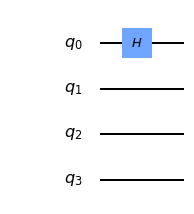

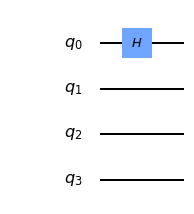

In [8]:
qubits.qc.h(0)
qubits.qc.draw(output='mpl')

In [9]:
# Here we applied an h gate to qubit 0. However, if we look at the state of this qubit we will find that it has not changed.
qubits.get_bloch(0)

{'X': 0.015625, 'Y': 0.01416015625, 'Z': 1.0}

In [10]:
# This is because we actually have to run the circuit in order to update the tomography. 
# This is done using the update_tomography() method.
qubits.update_tomography()
print(qubits.get_bloch(0))

{'X': 1.0, 'Y': 0.000732421875, 'Z': 0.013671875}


In [11]:
# Another way to manipulate the qubits, which is unique to this method, is to give target values for the variables. 
# This is done using the method set_bloch().  For example, to set the state of qubit 1
qubits.set_bloch({'X':1},1)

In [12]:
# This automatically updates the tomography (unless the keyword update=False is added)
# we can already verify that it has the correct effect.
print(qubits.get_bloch(1))

{'X': 1.0, 'Y': 0.00830078125, 'Z': 0.0146484375}


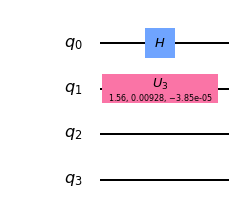

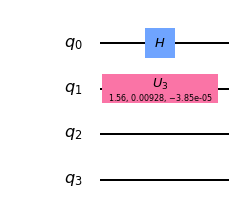

In [13]:
qubits.qc.draw(output='mpl')

In [14]:
# The target state for the set_bloch() method can include multiple values.
qubits.set_bloch({'X':1, 'Z':1},2)
print(qubits.get_bloch(2))

{'X': 0.710693359375, 'Y': 0.015380859375, 'Z': 0.711181640625}


In [18]:
qubits = QuantumGraph(2)

print(qubits.get_relationship(0,1))

{'XX': -0.019775390625, 'XY': -0.01025390625, 'XZ': 0.0068359375, 'YX': 0.00048828125, 'YY': -0.002197265625, 'YZ': -0.004638671875, 'ZX': -0.010009765625, 'ZY': 0.000732421875, 'ZZ': 1.0}


In [20]:
qubits.set_relationship( {'XX':1}, 0,1, fraction=0.5 )

FATAL: Cannot solve SDPs with > 2x2 matrices without linked blas+lapack libraries
Install blas+lapack and re-compile SCS with blas+lapack library locations
ERROR: init_cone failure
Failure:could not initialize work


C:\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 9 times so far.

  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 10 times so far.

  warnings.warn(msg, UserWarning)


SolverError: Solver 'SCS' failed. Try another solver, or solve with verbose=True for more information.